In [53]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta


In [55]:
ticker = "ROKU"

In [56]:
# Step 2: Define function to fetch data
def fetch_stock_data(ticker, period='1y'):
    """
    Fetch historical stock data for the given ticker symbol.
    
    Parameters:
        ticker (str): The stock ticker symbol.
        period (str): The time period for data, e.g., '1y', '5y', 'max', etc.
        
    Returns:
        pd.DataFrame: DataFrame containing historical stock data.
    """
    stock_data = yf.Ticker(ticker)
    return stock_data.history(period=period)

In [57]:
data = fetch_stock_data(ticker)

# Display the first few rows of the dataset
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-30 00:00:00-04:00,56.880001,57.250000,55.020000,56.349998,4378200,0.0,0.0
2023-10-31 00:00:00-04:00,57.270000,59.689999,56.459999,59.570000,7088200,0.0,0.0
2023-11-01 00:00:00-04:00,59.139999,59.889999,57.320000,59.700001,12571200,0.0,0.0
2023-11-02 00:00:00-04:00,70.860001,79.120003,69.180000,78.050003,40334800,0.0,0.0
2023-11-03 00:00:00-04:00,79.449997,86.089996,79.339996,84.750000,28088600,0.0,0.0


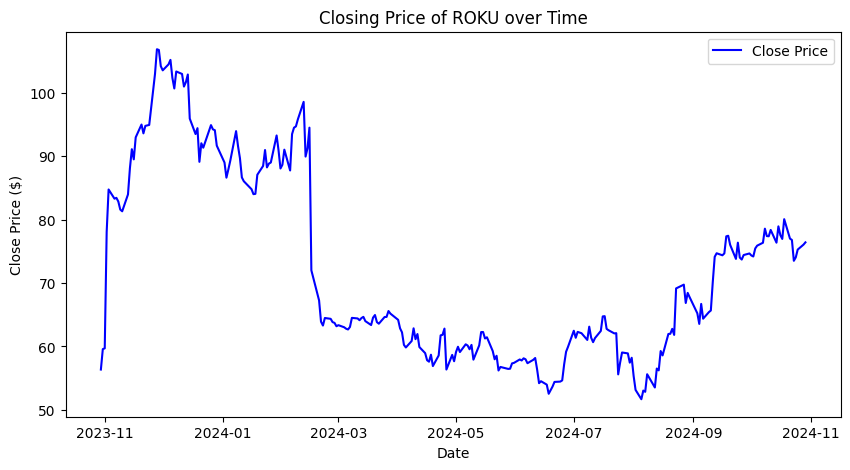

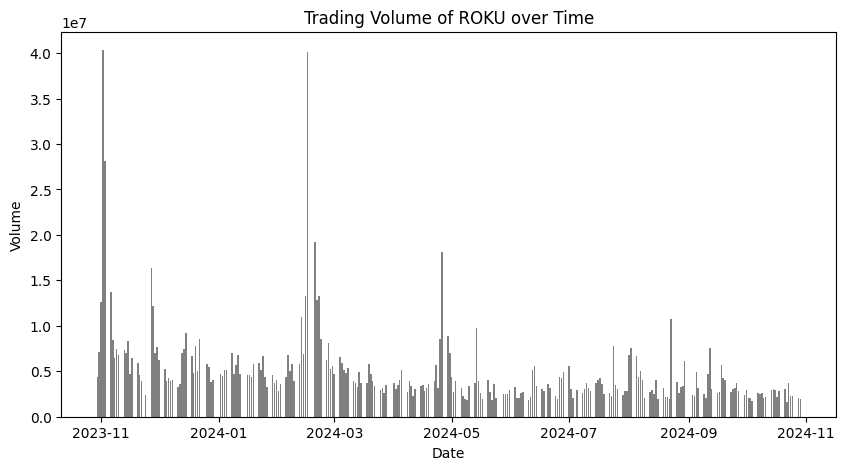

In [58]:
# Step 4: Plotting functions
def plot_close_price(data, ticker):
    """
    Plot the closing price over time.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing stock data.
        ticker (str): The stock ticker symbol.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title(f'Closing Price of {ticker} over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price ($)')
    plt.legend()
    plt.show()

def plot_volume(data, ticker):
    """
    Plot the trading volume over time.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing stock data.
        ticker (str): The stock ticker symbol.
    """
    plt.figure(figsize=(10, 5))
    plt.bar(data.index, data['Volume'], color='grey')
    plt.title(f'Trading Volume of {ticker} over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.show()

# Step 5: Visualize the stock data
plot_close_price(data, ticker)
plot_volume(data, ticker)


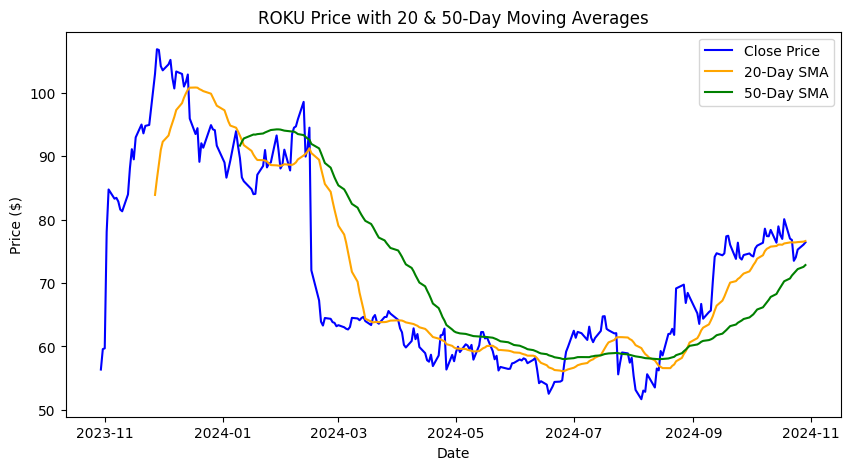

In [59]:
# Additional Analysis: Moving Averages
def plot_moving_averages(data, ticker, short_window=20, long_window=50):
    """
    Plot moving averages for the stock.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing stock data.
        ticker (str): The stock ticker symbol.
        short_window (int): Short period for moving average.
        long_window (int): Long period for moving average.
    """
    data['SMA20'] = data['Close'].rolling(window=short_window).mean()
    data['SMA50'] = data['Close'].rolling(window=long_window).mean()
    
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.plot(data.index, data['SMA20'], label=f'{short_window}-Day SMA', color='orange')
    plt.plot(data.index, data['SMA50'], label=f'{long_window}-Day SMA', color='green')
    plt.title(f'{ticker} Price with {short_window} & {long_window}-Day Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()

# Plot moving averages
plot_moving_averages(data, ticker)

In [61]:
# Step 2: Define function to fetch earnings data
def fetch_earnings_data(ticker):
    """
    Fetch quarterly earnings data for the given ticker symbol.
    
    Parameters:
        ticker (str): The stock ticker symbol.
        
    Returns:
        pd.DataFrame: DataFrame containing earnings data.
    """
    stock_data = yf.Ticker(ticker)
    earnings_data = stock_data.quarterly_financials
    return earnings_data

# Step 3: Fetch earnings data for a sample ticker
earnings_data = fetch_earnings_data(ticker)

# # Select the last 12 quarters
# earnings_data = earnings_data.head(12)
earnings_data

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,0.0,NaN
Tax Rate For Calcs,0.212483,0.21,0.21,0.21,0.21,NaN
Normalized EBITDA,64477000.0,-17731000.0,-46661000.0,-326877000.0,10130000.0,NaN
Net Income From Continuing Operation Net Minority Interest,-33953000.0,-50855000.0,-78291000.0,-330071000.0,-107595000.0,NaN
Reconciled Depreciation,135720000.0,28349000.0,29842000.0,-68843000.0,136090000.0,NaN
Reconciled Cost Of Revenue,543479000.0,493178000.0,546501000.0,543195000.0,468915000.0,NaN
EBITDA,64477000.0,-17731000.0,-46661000.0,-326877000.0,10130000.0,NaN
EBIT,-71243000.0,-46080000.0,-76503000.0,-326877000.0,-125960000.0,NaN
Net Interest Income,NaN,-10000.0,-35000.0,-10000.0,-4000.0,-681000.0
Interest Expense,NaN,10000.0,35000.0,10000.0,4000.0,681000.0


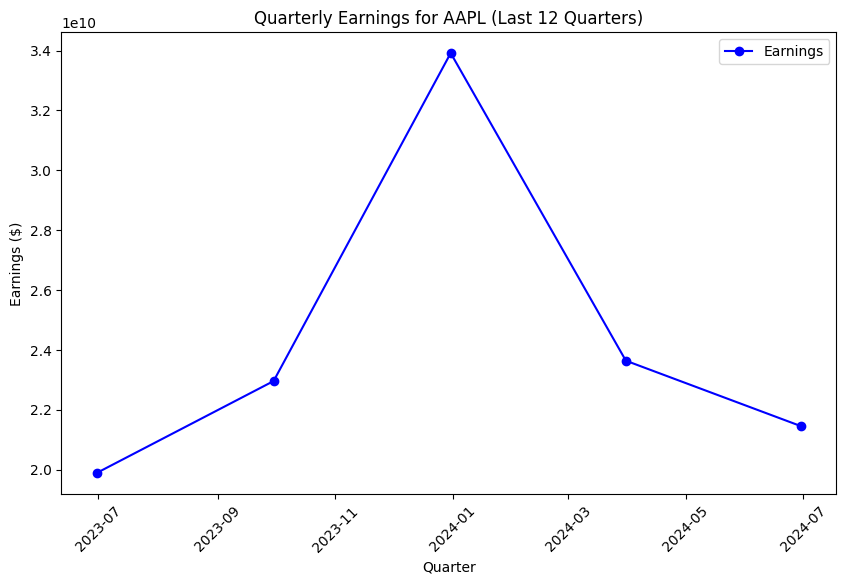

In [62]:

# Step 2: Define function to fetch and handle quarterly financial data
def fetch_quarterly_earnings_data(ticker):
    """
    Fetch quarterly financial data for the given ticker symbol.
    
    Parameters:
        ticker (str): The stock ticker symbol.
        
    Returns:
        pd.DataFrame: DataFrame containing processed quarterly earnings data.
    """
    stock_data = yf.Ticker(ticker)
    
    # First try to get data from quarterly financials
    financials = stock_data.quarterly_financials.T
    if 'Net Income' in financials.columns:
        earnings_data = financials[['Net Income']].rename(columns={'Net Income': 'Earnings'})
    else:
        print("No 'Net Income' data found in quarterly financials.")
        earnings_data = pd.DataFrame()
    
    # If data is sparse, try filling gaps using quarterly cash flow as a proxy
    if earnings_data.isna().any().any():
        cashflow = stock_data.quarterly_cashflow.T
        if 'Free Cash Flow' in cashflow.columns:
            earnings_data['Earnings'] = earnings_data['Earnings'].combine_first(cashflow['Free Cash Flow'])
    
    # Drop rows with any remaining NaN values and limit to the last 12 quarters
    earnings_data = earnings_data.dropna().head(12).iloc[::-1]  # Reverse to order by oldest to latest
    return earnings_data

# Step 3: Fetch and handle data for a sample ticker
earnings_data = fetch_quarterly_earnings_data(ticker)

# Step 4: Plot quarterly earnings data
def plot_quarterly_earnings(earnings_data, ticker):
    """
    Plot the quarterly earnings over time.
    
    Parameters:
        earnings_data (pd.DataFrame): DataFrame containing earnings data.
        ticker (str): The stock ticker symbol.
    """
    if earnings_data is not None and not earnings_data.empty:
        plt.figure(figsize=(10, 6))
        plt.plot(earnings_data.index, earnings_data['Earnings'], marker='o', color='blue', label='Earnings')
        plt.title(f'Quarterly Earnings for {ticker} (Last 12 Quarters)')
        plt.xlabel('Quarter')
        plt.ylabel('Earnings ($)')
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()
    else:
        print("No earnings data to display.")

# Display and plot the earnings data
earnings_data
plot_quarterly_earnings(earnings_data, ticker)

In [49]:

# Step 2: Define function to fetch quarterly financial data
def fetch_quarterly_financial_data(ticker):
    """
    Fetch quarterly earnings and revenue data for the given ticker symbol.
    
    Parameters:
        ticker (str): The stock ticker symbol.
        
    Returns:
        pd.DataFrame: DataFrame containing processed quarterly earnings and revenue data.
    """
    stock_data = yf.Ticker(ticker)
    
    # Retrieve quarterly financials
    financials = stock_data.quarterly_financials.T
    
    # Extract Net Income and Revenue data if available
    earnings_data = pd.DataFrame()
    if 'Net Income' in financials.columns:
        earnings_data['Earnings'] = financials['Net Income']
    if 'Total Revenue' in financials.columns:
        earnings_data['Revenue'] = financials['Total Revenue']
    
    # Check for missing data and attempt to use alternative data sources if necessary
    if earnings_data['Earnings'].isna().any():
        cashflow = stock_data.quarterly_cashflow.T
        if 'Free Cash Flow' in cashflow.columns:
            earnings_data['Earnings'] = earnings_data['Earnings'].combine_first(cashflow['Free Cash Flow'])
    if earnings_data['Revenue'].isna().any():
        balance_sheet = stock_data.quarterly_balance_sheet.T
        if 'Total Assets' in balance_sheet.columns:
            # Using Total Assets as an approximation for missing revenue data as a last resort
            earnings_data['Revenue'] = earnings_data['Revenue'].combine_first(balance_sheet['Total Assets'])
    
    # Drop rows with any remaining NaN values and limit to last 12 quarters
    earnings_data = earnings_data.dropna().head(12).iloc[::-1]  # Reverse to order by oldest to latest
    return earnings_data

# Step 3: Fetch data for a sample ticker
financial_data = fetch_quarterly_financial_data(ticker)

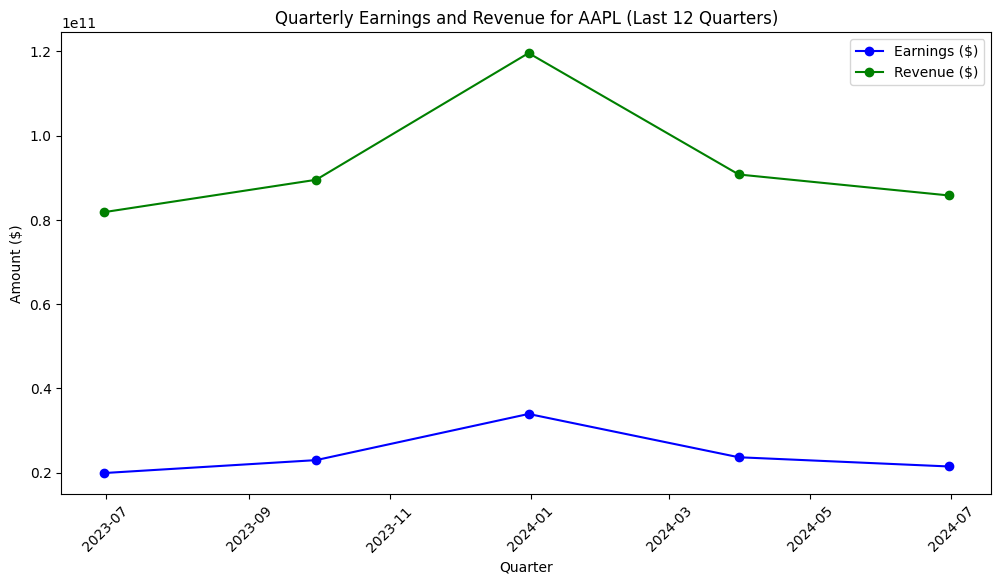

In [52]:
# Step 2: Define function to fetch quarterly financial data
def fetch_quarterly_financial_data(ticker):
    """
    Fetch quarterly earnings and revenue data for the given ticker symbol.
    
    Parameters:
        ticker (str): The stock ticker symbol.
        
    Returns:
        pd.DataFrame: DataFrame containing processed quarterly earnings and revenue data.
    """
    stock_data = yf.Ticker(ticker)
    
    # Retrieve quarterly financials
    financials = stock_data.quarterly_financials.T
    
    # Extract Net Income and Revenue data if available
    earnings_data = pd.DataFrame()
    if 'Net Income' in financials.columns:
        earnings_data['Earnings'] = financials['Net Income']
    if 'Total Revenue' in financials.columns:
        earnings_data['Revenue'] = financials['Total Revenue']
    
    # Check for missing data and attempt to use alternative data sources if necessary
    if earnings_data['Earnings'].isna().any():
        cashflow = stock_data.quarterly_cashflow.T
        if 'Free Cash Flow' in cashflow.columns:
            earnings_data['Earnings'] = earnings_data['Earnings'].combine_first(cashflow['Free Cash Flow'])
    if earnings_data['Revenue'].isna().any():
        balance_sheet = stock_data.quarterly_balance_sheet.T
        if 'Total Assets' in balance_sheet.columns:
            # Using Total Assets as an approximation for missing revenue data as a last resort
            earnings_data['Revenue'] = earnings_data['Revenue'].combine_first(balance_sheet['Total Assets'])
    
    # Drop rows with any remaining NaN values and limit to last 12 quarters
    earnings_data = earnings_data.dropna().head(12).iloc[::-1]  # Reverse to order by oldest to latest
    return earnings_data

# Step 3: Fetch data for a sample ticker
financial_data = fetch_quarterly_financial_data(ticker)

# Step 4: Plot earnings and revenue data
def plot_earnings_and_revenue(financial_data, ticker):
    """
    Plot the quarterly earnings and revenue over time.
    
    Parameters:
        financial_data (pd.DataFrame): DataFrame containing earnings and revenue data.
        ticker (str): The stock ticker symbol.
    """
    if financial_data is not None and not financial_data.empty:
        plt.figure(figsize=(12, 6))
        
        # Plot Earnings
        plt.plot(financial_data.index, financial_data['Earnings'], marker='o', color='blue', label='Earnings ($)')
        
        # Plot Revenue
        plt.plot(financial_data.index, financial_data['Revenue'], marker='o', color='green', label='Revenue ($)')
        
        # Titles and labels
        plt.title(f'Quarterly Earnings and Revenue for {ticker} (Last 12 Quarters)')
        plt.xlabel('Quarter')
        plt.ylabel('Amount ($)')
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()
    else:
        print("No financial data to display.")

# Display and plot the financial data
financial_data
plot_earnings_and_revenue(financial_data, ticker)


/var/folders/x9/w5bs1hxs7w36_bmpzd_bm8th0000gn/T/ipykernel_76557/2844737152.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closing_prices = [stock_data.history(start=(date - timedelta(days=10)), end=(date + timedelta(days=10))).Close[-1]
/var/folders/x9/w5bs1hxs7w36_bmpzd_bm8th0000gn/T/ipykernel_76557/2844737152.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closing_prices = [stock_data.history(start=(date - timedelta(days=10)), end=(date + timedelta(days=10))).Close[-1]
/var/folders/x9/w5bs1hxs7w36_bmpzd_bm8th0000gn/T/ipykernel_76557/2844737152.py:28: FutureWarning: Series.__getitem__ treating keys as po

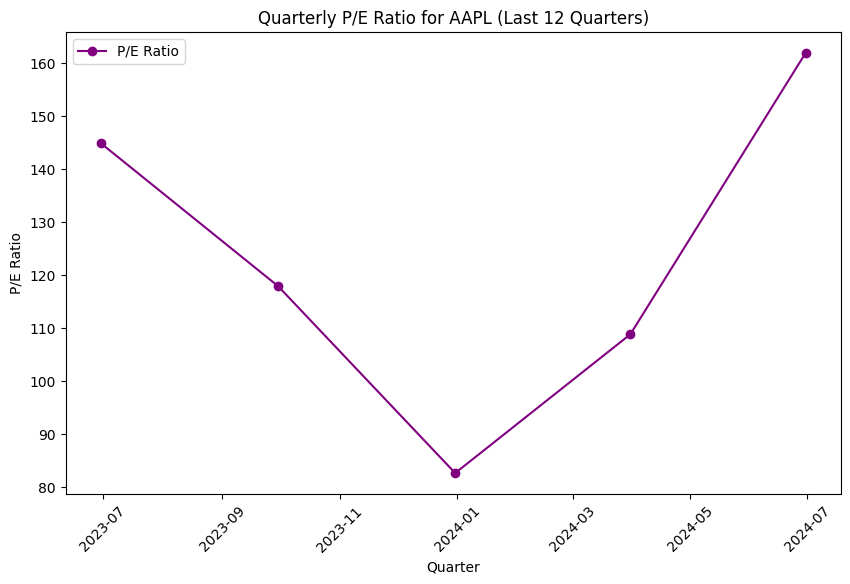

In [54]:
# Step 2: Define function to fetch and calculate quarterly P/E ratio
def fetch_quarterly_pe_ratio(ticker):
    """
    Fetch quarterly P/E ratio for the last 12 quarters.
    
    Parameters:
        ticker (str): The stock ticker symbol.
        
    Returns:
        pd.DataFrame: DataFrame containing dates, closing prices, EPS, and P/E ratios.
    """
    stock_data = yf.Ticker(ticker)
    
    # Retrieve quarterly financials and shares outstanding data
    financials = stock_data.quarterly_financials.T
    shares_outstanding = stock_data.info.get('sharesOutstanding', None)
    
    # Ensure we have Net Income data
    if 'Net Income' not in financials.columns or shares_outstanding is None:
        print("Necessary financial data is not available for this ticker.")
        return None
    
    # Calculate EPS for each quarter
    financials['EPS'] = financials['Net Income'] / shares_outstanding
    
    # Retrieve the last 12 quarter-end dates and close prices
    quarter_end_dates = financials.index.to_list()
    closing_prices = [stock_data.history(start=(date - timedelta(days=10)), end=(date + timedelta(days=10))).Close[-1]
                      for date in quarter_end_dates]

    # Calculate P/E ratio
    financials['Closing Price'] = closing_prices
    financials['P/E Ratio'] = financials['Closing Price'] / financials['EPS']
    
    # Limit to last 12 quarters and clean up data
    pe_data = financials[['Closing Price', 'EPS', 'P/E Ratio']].head(12).iloc[::-1]  # Reverse order
    return pe_data

# Step 3: Fetch data for a sample ticker
pe_data = fetch_quarterly_pe_ratio(ticker)

# Step 4: Plot P/E ratio data
def plot_pe_ratio(pe_data, ticker):
    """
    Plot the quarterly P/E ratio over time.
    
    Parameters:
        pe_data (pd.DataFrame): DataFrame containing P/E ratio data.
        ticker (str): The stock ticker symbol.
    """
    if pe_data is not None and not pe_data.empty:
        plt.figure(figsize=(10, 6))
        
        # Plot P/E Ratio
        plt.plot(pe_data.index, pe_data['P/E Ratio'], marker='o', color='purple', label='P/E Ratio')
        
        # Titles and labels
        plt.title(f'Quarterly P/E Ratio for {ticker} (Last 12 Quarters)')
        plt.xlabel('Quarter')
        plt.ylabel('P/E Ratio')
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()
    else:
        print("No P/E ratio data to display.")

# Display and plot the P/E ratio data
pe_data
plot_pe_ratio(pe_data, ticker)